In [126]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean 


In [127]:
vas = xr.open_dataset(r'..\data\raw\vas_1860_1899.nc')
tas = xr.open_dataset(r'..\data\raw\tas_1860_1899.nc')


In [128]:
t_mean_wind = vas.vas.mean('time')


In [129]:
t_mean_temp = tas.tas.mean('time')


# a)

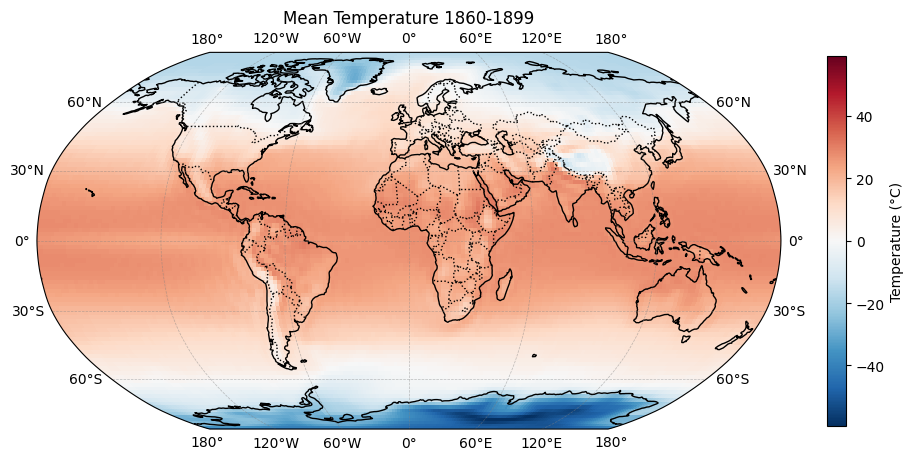

In [132]:
year = 0

data = t_mean_temp[:, :] - 273.15

edge = np.abs(data).max()

# Create figure and axes with a specific projection
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.Robinson())

# Plot the temperature difference with proper transformation
mesh = ax.pcolormesh(vas.lon, vas.lat, data, 
                    transform=ccrs.PlateCarree(),
                    cmap='RdBu_r', vmin=-edge, vmax=edge)

# Add coastlines and other map features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, alpha=0.1)
ax.add_feature(cfeature.OCEAN, alpha=0.1)

# Add gridlines
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

# Add colorbar
cbar = plt.colorbar(mesh, shrink=0.6, pad=0.05)
cbar.set_label('Temperature (°C)')

# Add title
plt.title(f'Mean Temperature 1860-1899')
plt.show()


This plot shows the average 2m temperature during the years 1860-1899. One can see the significant difference between the equator and the poles.

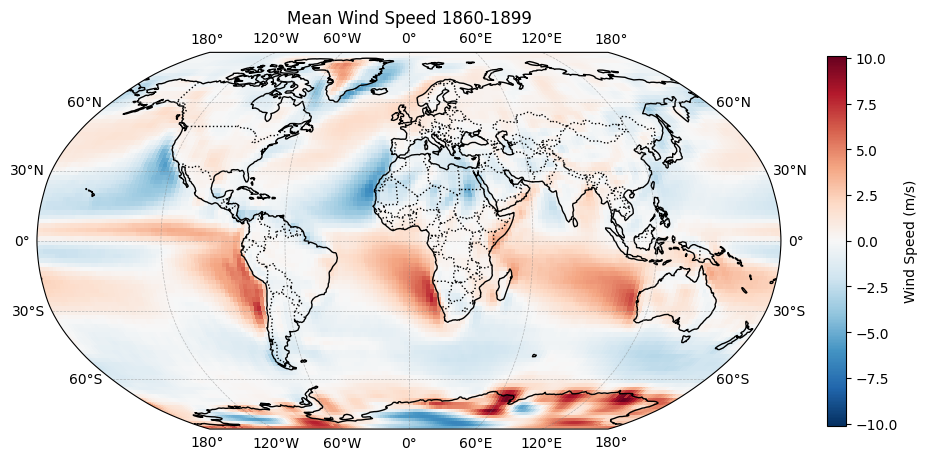

In [134]:
# Create figure and axes with a specific projection
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.Robinson())

year = 0

data = t_mean_wind[:, :]

edge = np.abs(data).max()

# Plot the temperature difference with proper transformation
mesh = ax.pcolormesh(vas.lon, vas.lat, data, 
                    transform=ccrs.PlateCarree(),
                    cmap='RdBu_r', vmin=-edge, vmax=edge)

# Add coastlines and other map features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, alpha=0.1)
ax.add_feature(cfeature.OCEAN, alpha=0.1)

# Add gridlines
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

# Add colorbar
cbar = plt.colorbar(mesh, shrink=0.6, pad=0.05)
cbar.set_label('Wind Speed (m/s)')

# Add title
plt.title(f'Mean Wind Speed 1860-1899')
plt.show()


This plot shows the average 10m meridional wind speed during the year 1860-1899. One can see the difference atmospheric cells. Near the equator the Hadley cell with meridional wind speeds toward the equator. In the mid latitudes the Ferrell cell with poleward wind speeds. The polar cell is less clearly visible.

# b)

In [136]:
mean_zonal_temp = t_mean_temp.mean(dim='lon')
mean_zonal_wind = t_mean_wind.mean(dim='lon')


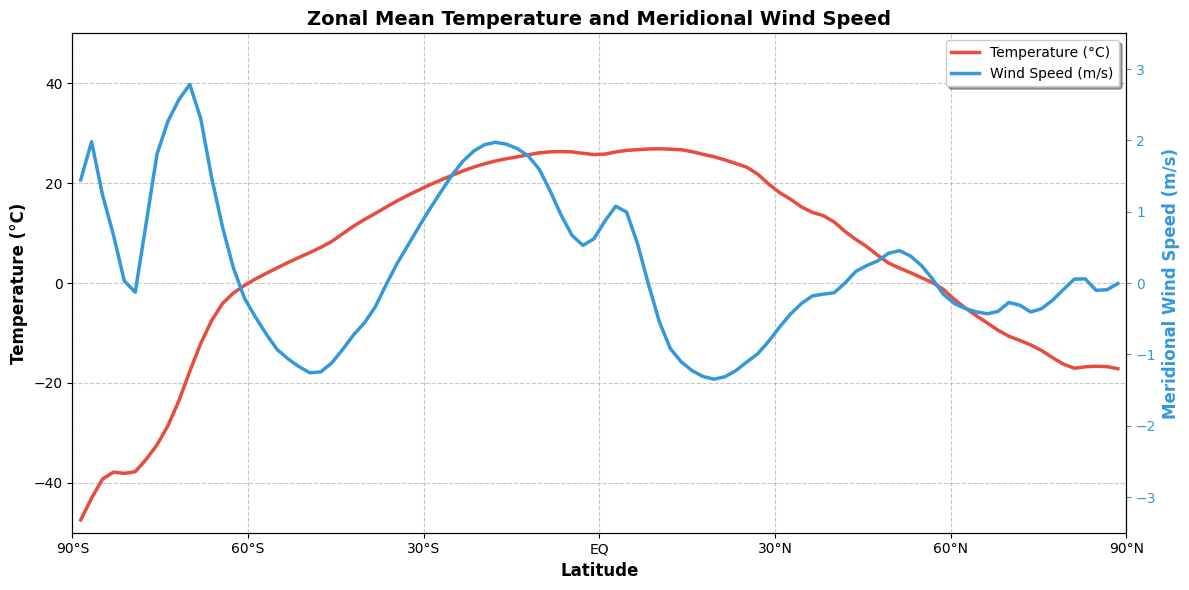

In [139]:
# Create a more visually appealing figure
fig, ax = plt.subplots(figsize=(12, 6))

# Convert temperature from Kelvin to Celsius
temperature_celsius = mean_zonal_temp[:] - 273.15

# Plot temperature with improved styling
ax.plot(mean_zonal_temp.lat, temperature_celsius, 
    linewidth=2.5, color='#e74c3c', label='Temperature (°C)')

# Add gridlines and improve aesthetics
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

# Add labels and title
ax.set_xlabel('Latitude', fontsize=12, fontweight='bold')
ax.set_ylabel('Temperature (°C)', fontsize=12, fontweight='bold')
ax.set_title(f'Zonal Mean Temperature and Meridional Wind Speed', fontsize=14, fontweight='bold')
ax.set_ylim(-50,50)


# Add second axis for wind speed
ax2 = ax.twinx()
ax2.plot(mean_zonal_wind.lat, mean_zonal_wind[:], 
     linewidth=2.5, color='#3498db', label='Wind Speed (m/s)')
ax2.set_ylabel('Meridional Wind Speed (m/s)', fontsize=12, fontweight='bold', color='#3498db')
ax2.tick_params(axis='y', colors='#3498db')
ax2.set_ylim(-3.5,3.5)

# Add legend
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2, loc='best', frameon=True, fancybox=True, 
      shadow=True, fontsize=10)

# Improve x-axis
ax.set_xlim(-90, 90)
ax.set_xticks([-90, -60, -30, 0, 30, 60, 90])
ax.set_xticklabels(['90°S', '60°S', '30°S', 'EQ', '30°N', '60°N', '90°N'])

plt.tight_layout()


This plot shows the zonal mean of the temperature and meridional wind speed. One can again see the clear difference between poles and equator. The atmospheric cells are also observable. The wind speed seems to be in general higher in the southern hemisphere than in the northern.

# c)

In [140]:
# Extract the first 12 months and broadcast the climatology for subtraction
# This calculates the anomaly from the yearly mean for the first year (1860)
spatial_var_temp = tas.tas - mean_zonal_temp.values[np.newaxis, :, np.newaxis]
spatial_var_wind = vas.vas - mean_zonal_wind.values[np.newaxis, :, np.newaxis]


In [141]:
t_mean_spatial_var_temp = spatial_var_temp.mean('time') 
t_mean_spatial_var_wind = spatial_var_wind.mean('time')


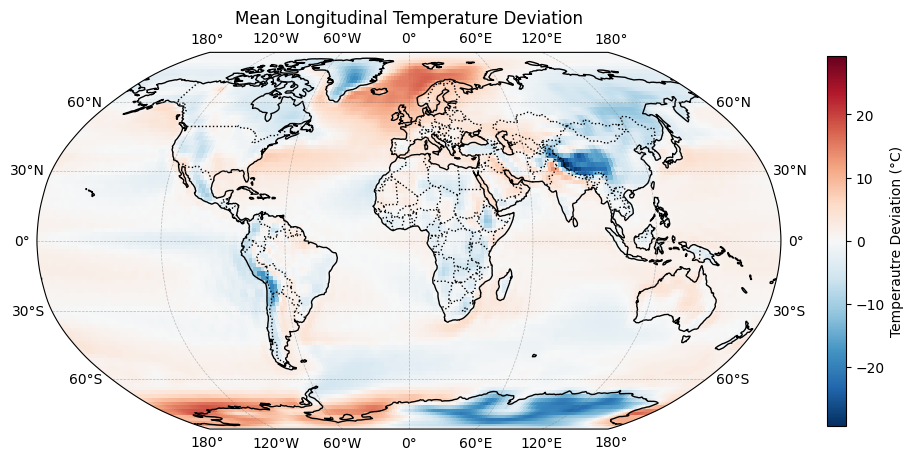

In [142]:
# Create figure and axes with a specific projection
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.Robinson())

year = 0

data = t_mean_spatial_var_temp[:, :]

edge = np.abs(data).max()

# Plot the temperature difference with proper transformation
mesh = ax.pcolormesh(vas.lon, vas.lat, data, 
                    transform=ccrs.PlateCarree(),
                    cmap='RdBu_r', vmin=-edge, vmax=edge)

# Add coastlines and other map features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, alpha=0.1)
ax.add_feature(cfeature.OCEAN, alpha=0.1)

# Add gridlines
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

# Add colorbar
cbar = plt.colorbar(mesh, shrink=0.6, pad=0.05)
cbar.set_label('Temperautre Deviation (°C)')

# Add title
plt.title(f'Mean Longitudinal Temperature Deviation')
plt.show()


This plot shows the deviation of the temperature at each point to the zonal average temperature. This shows regions that are warmer/colder than the average temperature in that latitude. Notable are for example the Himalayas, which are colder than the average zonal temperature, or the region of the north eastern atlantic which is warmer than the zonal average due to the gulf stream.

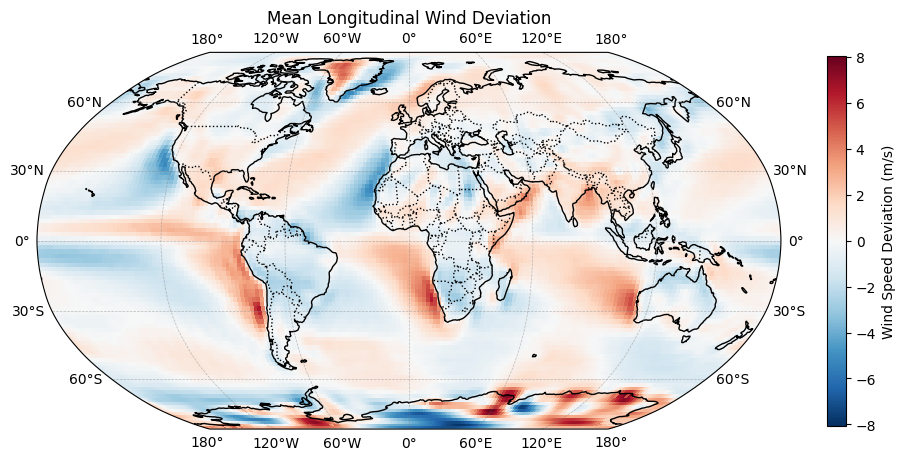

In [143]:
# Create figure and axes with a specific projection
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.Robinson())

year = 0

data = t_mean_spatial_var_wind[:, :]

edge = np.abs(data).max()

# Plot the temperature difference with proper transformation
mesh = ax.pcolormesh(vas.lon, vas.lat, data, 
                    transform=ccrs.PlateCarree(),
                    cmap='RdBu_r', vmin=-edge, vmax=edge)

# Add coastlines and other map features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, alpha=0.1)
ax.add_feature(cfeature.OCEAN, alpha=0.1)

# Add gridlines
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

# Add colorbar
cbar = plt.colorbar(mesh, shrink=0.6, pad=0.05)
cbar.set_label('Wind Speed Deviation (m/s)')

# Add title
plt.title(f'Mean Longitudinal Wind Deviation')
plt.show()


This plot shows the deviation of the 10m wind speed to the zonal average wind speed. Here the regions off the western coast of the continents are notable, where the meridional wind speed is in general higher than in the zonal average.

# d)

In [146]:
# Calculate temporal variability by computing anomalies from the climatology
# instead of zonal average anomalies (as in cell 9)
temp_var_temp = tas.tas[:,:] - t_mean_temp[:,:].values[np.newaxis, :, :]
temp_var_wind = vas.vas[:,:] - t_mean_wind[:,:].values[np.newaxis, :, :]

# Calculate the variance by squaring the anomalies and taking the time mean
t_mean_temp_var_temp = (temp_var_temp**2).mean('time') 
t_mean_temp_var_wind = (temp_var_wind**2).mean('time')


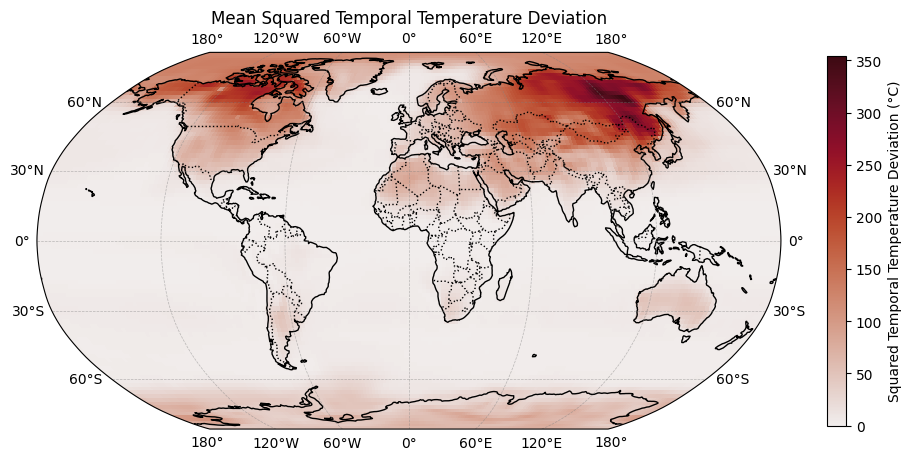

In [147]:
# Create figure and axes with a specific projection
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.Robinson())

year = 0

data = t_mean_temp_var_temp[:, :]

edge = np.abs(data).max()

# Plot the temperature difference with proper transformation
mesh = ax.pcolormesh(vas.lon, vas.lat, data, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmocean.cm.amp, vmin=0, vmax=edge)

# Add coastlines and other map features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, alpha=0.1)
ax.add_feature(cfeature.OCEAN, alpha=0.1)

# Add gridlines
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

# Add colorbar
cbar = plt.colorbar(mesh, shrink=0.6, pad=0.05)
cbar.set_label('Squared Temporal Temperature Deviation (°C)')

# Add title
plt.title(f'Mean Squared Temporal Temperature Deviation')
plt.show()


This plot shows the mean deviation of the temperature to the yearly mean temperature so highlighting regions of strong seasonality. We see, that the continental regions of the norhtern hemisphere show the strongest deviations. This is likely due to the strong seasonality in these regions. In general one can see lower variations over the equator and higher variations in higher latitudes.

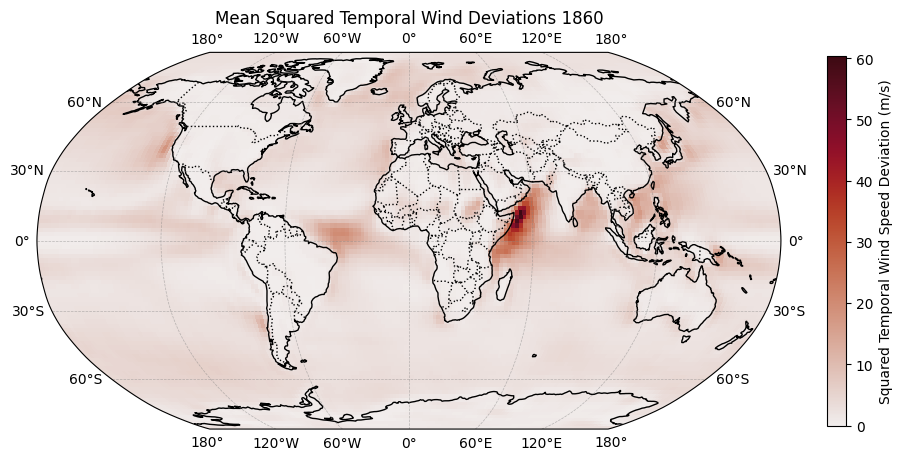

In [148]:
# Create figure and axes with a specific projection
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.Robinson())

year = 0

data = t_mean_temp_var_wind[:, :]

edge = np.abs(data).max()

# Plot the temperature difference with proper transformation
mesh = ax.pcolormesh(vas.lon, vas.lat, data, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmocean.cm.amp, vmin=0, vmax=edge)

# Add coastlines and other map features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, alpha=0.1)
ax.add_feature(cfeature.OCEAN, alpha=0.1)

# Add gridlines
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

# Add colorbar
cbar = plt.colorbar(mesh, shrink=0.6, pad=0.05)
cbar.set_label('Squared Temporal Wind Speed Deviation (m/s)')

# Add title
plt.title(f'Mean Squared Temporal Wind Deviations {year+1860}')
plt.show()


This plot shows the mean deviation of the 10m meridional wind speed to the yearly mean wind speed so highlighting regions of strong seasonality. We see, that the region of the eastern coast of central/northern africa shows the strongest deviations. This might be due to the monsoon winds in this region, which introduce a very strong seasonality.

# e)

In [149]:
cp = 1004 # J/kg/K


In [151]:
t_covariance = cp * (temp_var_temp * temp_var_wind).mean('time')


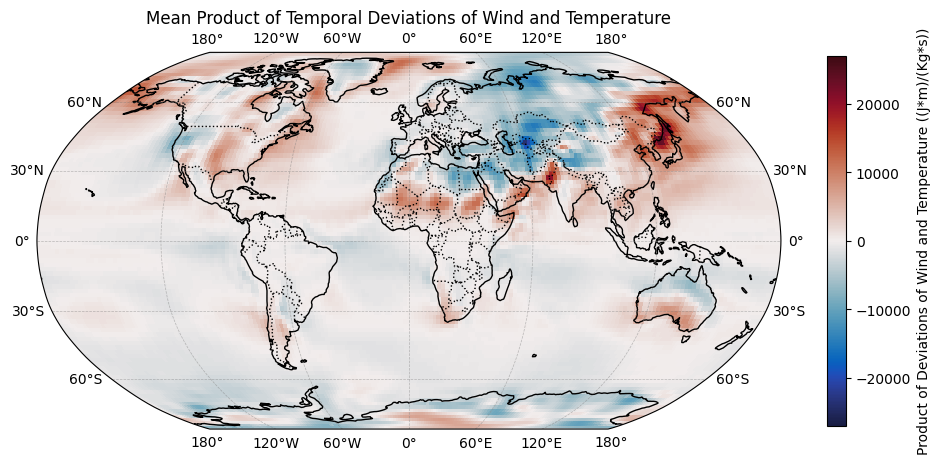

In [152]:
# Create figure and axes with a specific projection
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.Robinson())

year = 0

data = t_covariance[:, :]

edge = np.abs(data).max()

# Plot the temperature difference with proper transformation
mesh = ax.pcolormesh(vas.lon, vas.lat, data, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmocean.cm.balance, vmin=-edge, vmax=edge)

# Add coastlines and other map features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, alpha=0.1)
ax.add_feature(cfeature.OCEAN, alpha=0.1)

# Add gridlines
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

# Add colorbar
cbar = plt.colorbar(mesh, shrink=0.6, pad=0.05)
cbar.set_label('Product of Deviations of Wind and Temperature ((J*m)/(Kg*s))')

# Add title
plt.title(f'Mean Product of Temporal Deviations of Wind and Temperature')
plt.show()


This plot shows the temporal average of the product of temporal variations of temperature and wind speed. This is a meassure for the effect of transient eddyies in the flow field. It gives a meassure of how the energy is transported due to the effect of temporal variations in the mean flow. Positive values in the northern hemisphere indicate regions in wich a positive temperature anomalie is connected to a positive velocity anomalie and vice versa, indicating regions of net poleward heat transport. This is true for negative values in the southern hemisphere due to the switch in the meridional wind velocity. 

# f)

In [153]:
spatial_spatial = cp * mean_zonal_temp * mean_zonal_wind


In [154]:
s_covariance = (spatial_var_temp * spatial_var_wind).mean('time')


In [155]:
s_t_covariance = cp * (t_covariance).mean('lon')
s_s_covariance = cp * (s_covariance).mean('lon')


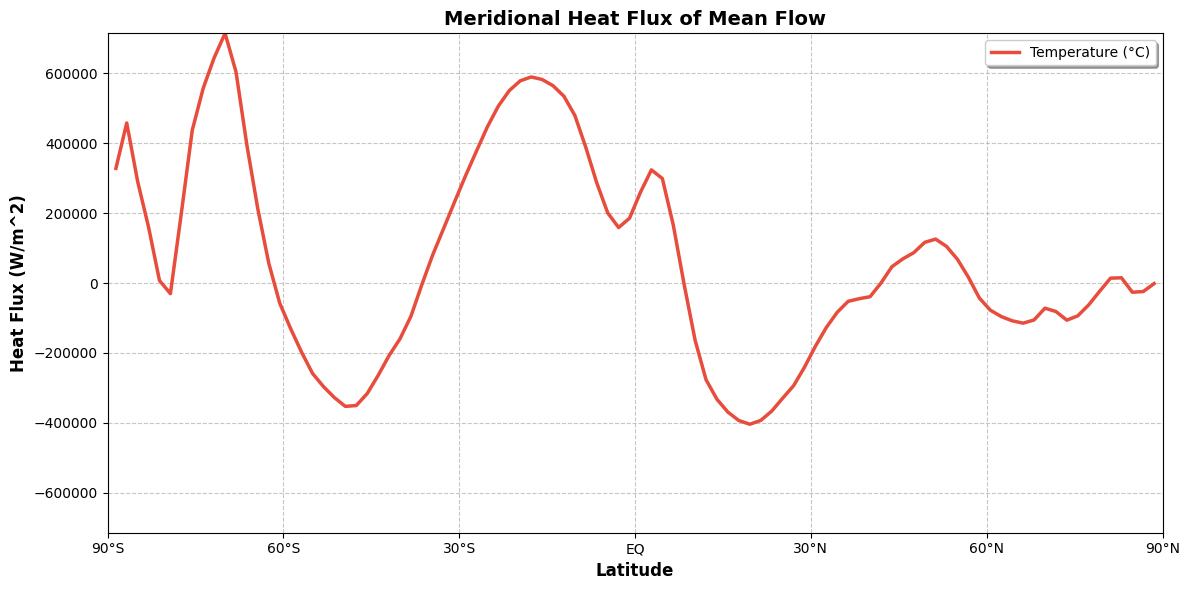

In [157]:
# Create a more visually appealing figure
fig, ax = plt.subplots(figsize=(12, 6))

# Convert temperature from Kelvin to Celsius
temperature_celsius = spatial_spatial[ :]

edge = np.abs(temperature_celsius).max()

# Plot temperature with improved styling
ax.plot(mean_zonal_temp.lat, temperature_celsius, 
    linewidth=2.5, color='#e74c3c', label='Temperature (°C)')

# Add gridlines and improve aesthetics
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

# Add labels and title
ax.set_xlabel('Latitude', fontsize=12, fontweight='bold')
ax.set_ylabel('Heat Flux (W/m^2)', fontsize=12, fontweight='bold')
ax.set_title(f'Meridional Heat Flux of Mean Flow', fontsize=14, fontweight='bold')
ax.set_ylim(-edge,edge)


# Add legend
lines1, labels1 = ax.get_legend_handles_labels()

ax.legend(lines1, labels1, loc='best', frameon=True, fancybox=True, 
      shadow=True, fontsize=10)

# Improve x-axis
ax.set_xlim(-90, 90)
ax.set_xticks([-90, -60, -30, 0, 30, 60, 90])
ax.set_xticklabels(['90°S', '60°S', '30°S', 'EQ', '30°N', '60°N', '90°N'])

plt.tight_layout()
plt.show()


This plot shows the advection of sensible heat by the time-mean and zonally-averaged flow. It captures the large-scale, persistent circulation cells like the Hadley Cell. These can be clearly seen in the plot. It can also be seen, that there is a net poleward transport.

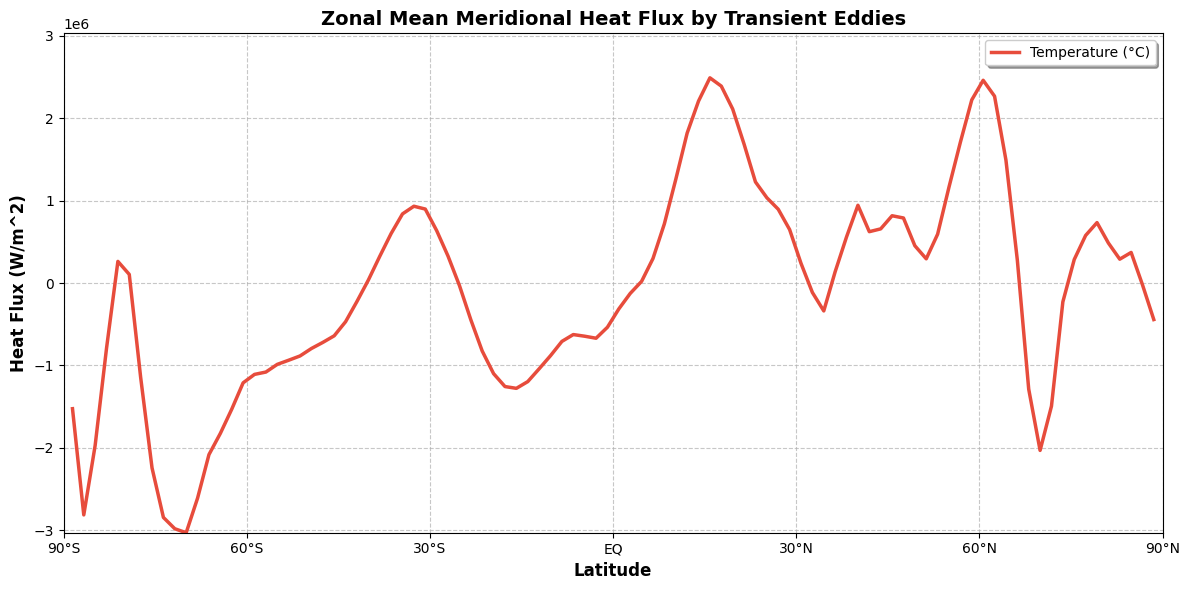

In [161]:
# Create a more visually appealing figure
fig, ax = plt.subplots(figsize=(12, 6))

# Convert temperature from Kelvin to Celsius
temperature_celsius = s_t_covariance[ :]

edge = np.abs(temperature_celsius).max()

# Plot temperature with improved styling
ax.plot(mean_zonal_temp.lat, temperature_celsius, 
    linewidth=2.5, color='#e74c3c', label='Temperature (°C)')

# Add gridlines and improve aesthetics
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

# Add labels and title
ax.set_xlabel('Latitude', fontsize=12, fontweight='bold')
ax.set_ylabel('Heat Flux (W/m^2)', fontsize=12, fontweight='bold')
ax.set_title(f'Zonal Mean Meridional Heat Flux by Transient Eddies', fontsize=14, fontweight='bold')
ax.set_ylim(-edge,edge)


# Add legend
lines1, labels1 = ax.get_legend_handles_labels()

ax.legend(lines1, labels1, loc='best', frameon=True, fancybox=True, 
      shadow=True, fontsize=10)

# Improve x-axis
ax.set_xlim(-90, 90)
ax.set_xticks([-90, -60, -30, 0, 30, 60, 90])
ax.set_xticklabels(['90°S', '60°S', '30°S', 'EQ', '30°N', '60°N', '90°N'])

plt.tight_layout()
plt.show()


This plot shows the advection of sensible heat by transient, time-varying eddies. These are the day-to-day weather systems like mid-latitude cyclones and anticyclones.

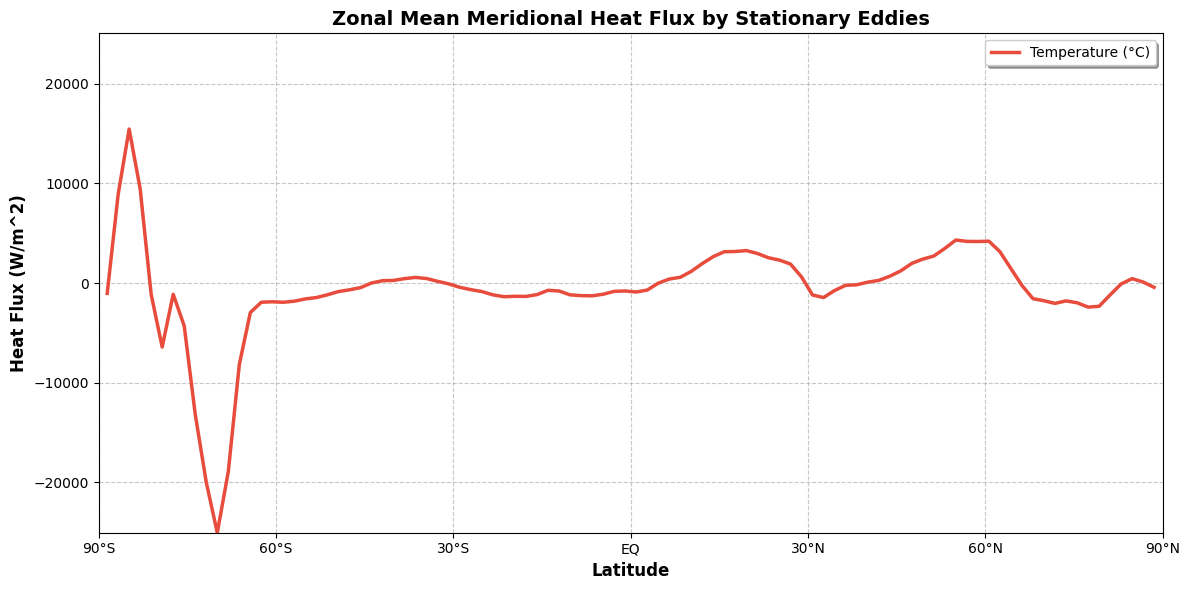

In [160]:
# Create a more visually appealing figure
fig, ax = plt.subplots(figsize=(12, 6))

# Convert temperature from Kelvin to Celsius
temperature_celsius = s_s_covariance[ :]

edge = np.abs(temperature_celsius).max()

# Plot temperature with improved styling
ax.plot(mean_zonal_temp.lat, temperature_celsius, 
    linewidth=2.5, color='#e74c3c', label='Temperature (°C)')

# Add gridlines and improve aesthetics
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

# Add labels and title
ax.set_xlabel('Latitude', fontsize=12, fontweight='bold')
ax.set_ylabel('Heat Flux (W/m^2)', fontsize=12, fontweight='bold')
ax.set_title(f'Zonal Mean Meridional Heat Flux by Stationary Eddies', fontsize=14, fontweight='bold')
ax.set_ylim(-edge,edge)


# Add legend
lines1, labels1 = ax.get_legend_handles_labels()

ax.legend(lines1, labels1, loc='best', frameon=True, fancybox=True, 
      shadow=True, fontsize=10)

# Improve x-axis
ax.set_xlim(-90, 90)
ax.set_xticks([-90, -60, -30, 0, 30, 60, 90])
ax.set_xticklabels(['90°S', '60°S', '30°S', 'EQ', '30°N', '60°N', '90°N'])

plt.tight_layout()
plt.show()


This plot shows the advection of sensible heat by eddies that are stationary in time but vary zonally. These are often associated with geographical features like continents, oceans, and mountain ranges, which create persistent high/low pressure systems and temperature gradients.